In [2]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,FunctionTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import seaborn as sns

# Helping Function 

## calculate skewness and kurtosis

In [3]:
def stats(dataframe):
    dataframe_describe = dataframe.describe()
    skeweness = dataframe.skew()
    kurtosis = dataframe.kurtosis()
    dataframe_describe = dataframe_describe.T
    dataframe_describe["skeweness"] = skeweness
    dataframe_describe["kurtosis"] = kurtosis
    return dataframe_describe

## Fill NaNs

In [4]:
def fillEmpty(dataFrame, feature, method="mean"):
    if(method == "mean"):
        mean = dataFrame[feature].mean()
        return dataFrame[feature].fillna(mean)
    elif (method == "median"):
        median = dataFrame[feature].median()
        return dataFrame[feature].fillna(median)
    elif (method == "zero"):
        return dataFrame[feature].fillna(0)

## Encoding

In [5]:
def LabelEncoding (dataFrame, feature):
    label_Encoding = LabelEncoder()
    dataFrame[feature] = label_Encoding.fit_transform(dataFrame[feature])
    return dataFrame

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Load Training Data and split them to train and label

In [6]:
drop_cloumns = ["Id"]
house_prices = pd.read_csv("train.csv")
house_prices_label = house_prices["SalePrice"]
house_prices = house_prices.drop(drop_cloumns,axis=1)

In [7]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Preprocessing

### Categorical features

In [8]:
categoricals = ["object"]
house_prices.select_dtypes(categoricals).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

### Label encoding

In [9]:
for feature in house_prices.select_dtypes(categoricals):
    house_prices = LabelEncoding(house_prices, feature)

In [10]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Numerical features

In [11]:
numerics = ['int64','float64']
house_prices.select_dtypes(numerics)["GarageYrBlt"].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [12]:
house_prices.select_dtypes(numerics).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### imputation

In [13]:
for feature in ["LotFrontage","MasVnrArea","GarageYrBlt"]:
    house_prices[feature] = fillEmpty(house_prices,feature,"zero" )

(array([484.,   0.,   0.,  41.,   0.,   0.,  10.,   0.,   0., 925.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

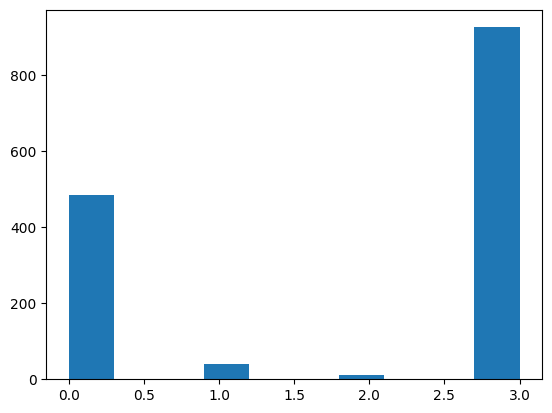

In [14]:
#plt.scatter(x="OverallCond", y="SalePrice",data = house_prices)
#sns.regplot(x="OverallQual", y="SalePrice", order = 1 , data = house_prices)
plt.hist(house_prices["LotShape"])
#sns.lmplot(x="OverallCond", y="SalePrice" , data = house_prices)

### Feature selection using correlation value

#### drop features with correlation value less than threshold (e.g 0.4)

In [15]:
saleprice_corr_series = abs(pd.DataFrame.corr(house_prices)["SalePrice"]) > 0.5
saleprice_corr_series

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice         True
Name: SalePrice, Length: 80, dtype: bool

In [16]:
for i,j in enumerate(house_prices):
    if(saleprice_corr_series.iloc[i] == False):
        house_prices = house_prices.drop(j,axis=1)

In [17]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   YearRemodAdd  1460 non-null   int64
 3   ExterQual     1460 non-null   int64
 4   BsmtQual      1460 non-null   int64
 5   TotalBsmtSF   1460 non-null   int64
 6   1stFlrSF      1460 non-null   int64
 7   GrLivArea     1460 non-null   int64
 8   FullBath      1460 non-null   int64
 9   KitchenQual   1460 non-null   int64
 10  TotRmsAbvGrd  1460 non-null   int64
 11  GarageFinish  1460 non-null   int64
 12  GarageCars    1460 non-null   int64
 13  GarageArea    1460 non-null   int64
 14  SalePrice     1460 non-null   int64
dtypes: int64(15)
memory usage: 171.2 KB


In [18]:
pd.DataFrame.corr(house_prices)

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,-0.634319,-0.614123,0.537808,0.476224,0.593007,0.550600,-0.555348,0.427452,-0.556863,0.600671,0.562022,0.790982
YearBuilt,0.572323,1.000000,0.592855,-0.494220,-0.529850,0.391452,0.281986,0.199010,0.468271,-0.359135,0.095589,-0.595781,0.537850,0.478954,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,-0.482496,-0.475118,0.291066,0.240379,0.287389,0.439046,-0.452431,0.191740,-0.444541,0.420622,0.371600,0.507101
ExterQual,-0.634319,-0.494220,-0.482496,1.000000,0.578015,-0.445952,-0.383767,-0.407642,-0.412808,0.641584,-0.289246,0.439162,-0.449980,-0.443532,-0.636884
BsmtQual,-0.614123,-0.529850,-0.475118,0.578015,1.000000,-0.478542,-0.347471,-0.357009,-0.399871,0.500835,-0.230223,0.462046,-0.480529,-0.445482,-0.620886
TotalBsmtSF,0.537808,0.391452,0.291066,-0.445952,-0.478542,1.000000,0.819530,0.454868,0.323722,-0.382415,0.285573,-0.371514,0.434585,0.486665,0.613581
1stFlrSF,0.476224,0.281986,0.240379,-0.383767,-0.347471,0.819530,1.000000,0.566024,0.380637,-0.356742,0.409516,-0.334139,0.439317,0.489782,0.605852
GrLivArea,0.593007,0.199010,0.287389,-0.407642,-0.357009,0.454868,0.566024,1.000000,0.630012,-0.381638,0.825489,-0.353021,0.467247,0.468997,0.708624
FullBath,0.550600,0.468271,0.439046,-0.412808,-0.399871,0.323722,0.380637,0.630012,1.000000,-0.337604,0.554784,-0.407588,0.469672,0.405656,0.560664
KitchenQual,-0.555348,-0.359135,-0.452431,0.641584,0.500835,-0.382415,-0.356742,-0.381638,-0.337604,1.000000,-0.263543,0.353258,-0.365124,-0.364862,-0.589189


In [19]:
house_prices = house_prices.drop("SalePrice", axis=1)

### Feature Kurotsis , skweenes and other insights 

In [20]:
stats(house_prices)

,count,mean,std,min,25%,50%,75%,max,skeweness,kurtosis
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0,0.216944,0.096293
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0,-0.613461,-0.439552
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0,-0.503562,-1.272245
ExterQual,1460.0,2.539726,0.693995,0.0,2.00,3.0,3.00,3.0,-1.830265,3.889635
BsmtQual,1460.0,2.305479,0.899225,0.0,2.00,2.0,3.00,4.0,-1.114573,1.184754
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0,1.524255,13.250483
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0,1.376757,5.745841
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0,1.366560,4.895121
FullBath,1460.0,1.565068,0.550916,0.0,1.00,2.0,2.00,3.0,0.036562,-0.857043
KitchenQual,1460.0,2.339726,0.830161,0.0,2.00,3.0,3.00,3.0,-1.422808,1.732124


### Feature scaling

In [21]:
standard_scaler = StandardScaler()
standard_scaler.fit(house_prices)
house_prices_normalized = standard_scaler.transform(house_prices)

In [22]:
house_prices_normalized = pd.DataFrame(house_prices_normalized, columns= house_prices.columns)

### plotting:

#### Histogram

Text(0.5, 1.0, 'KitchenQual')

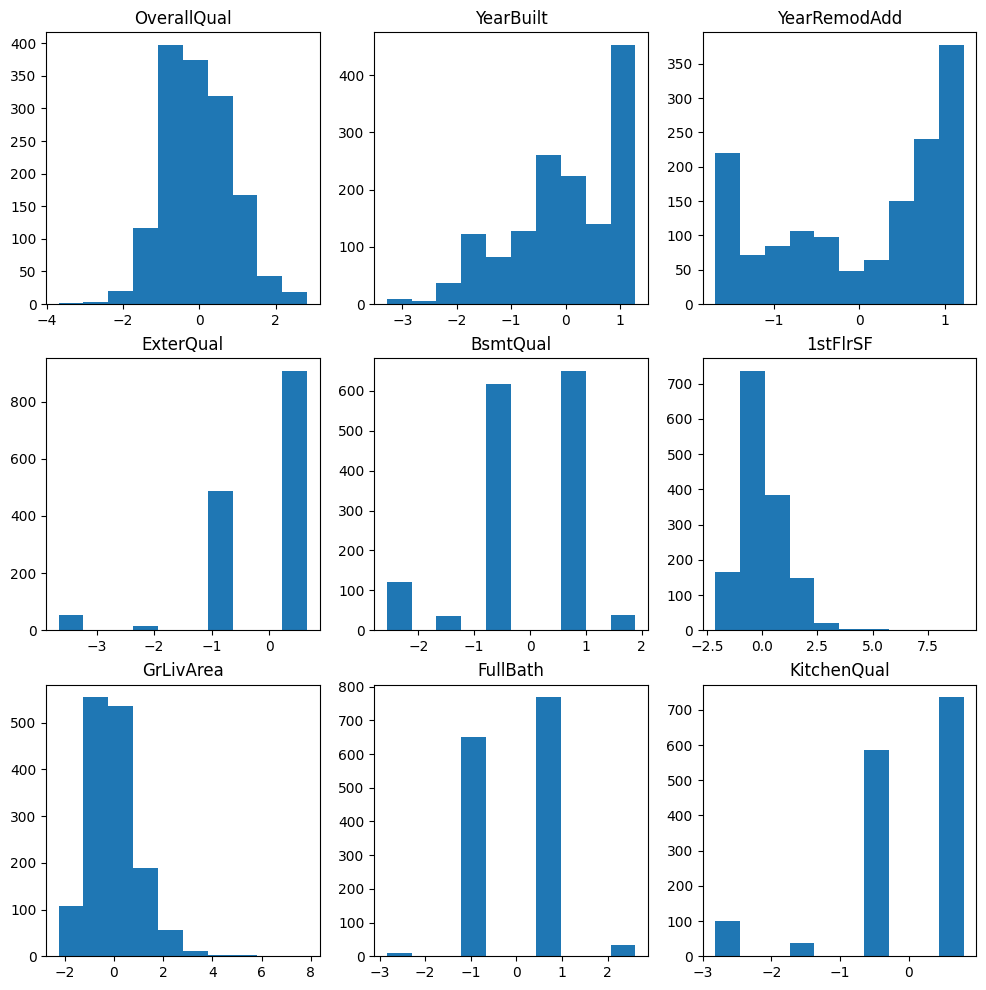

In [23]:
_ ,ax = plt.subplots(3,3,figsize=(12,12))
ax[0,0].hist(house_prices_normalized["OverallQual"])
ax[0,0].set_title("OverallQual")
ax[0,1].hist(house_prices_normalized["YearBuilt"])
ax[0,1].set_title("YearBuilt")
ax[0,2].hist(house_prices_normalized["YearRemodAdd"])
ax[0,2].set_title("YearRemodAdd")
ax[1,0].hist(house_prices_normalized["ExterQual"])
ax[1,0].set_title("ExterQual")
ax[1,1].hist(house_prices_normalized["BsmtQual"])
ax[1,1].set_title("BsmtQual")
ax[1,2].hist(house_prices_normalized["1stFlrSF"])
ax[1,2].set_title("1stFlrSF")
ax[2,0].hist(house_prices_normalized["GrLivArea"])
ax[2,0].set_title("GrLivArea")
ax[2,1].hist(house_prices_normalized["FullBath"])
ax[2,1].set_title("FullBath")
ax[2,2].hist(house_prices_normalized["KitchenQual"])
ax[2,2].set_title("KitchenQual")


Text(0.5, 1.0, 'GarageArea')

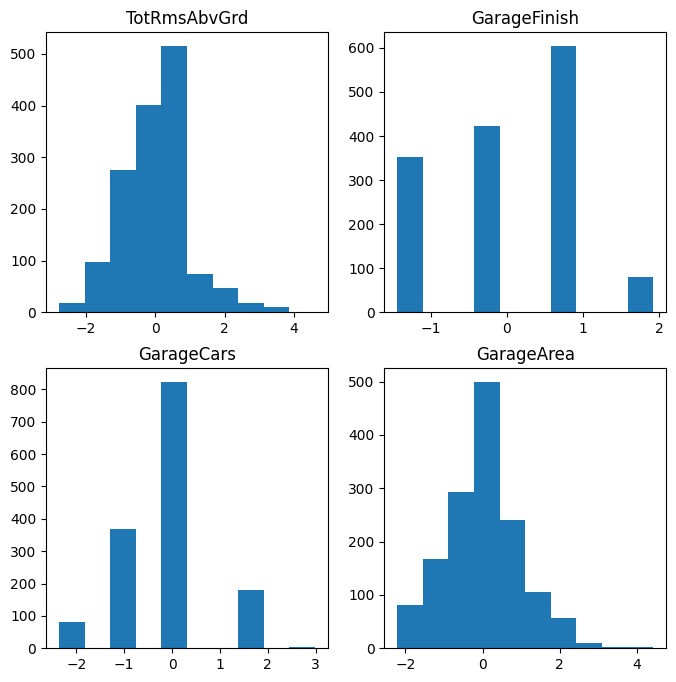

In [24]:
_ ,ax = plt.subplots(2,2,figsize=(8,8))
ax[0,0].hist(house_prices_normalized["TotRmsAbvGrd"])
ax[0,0].set_title("TotRmsAbvGrd")
ax[0,1].hist(house_prices_normalized["GarageFinish"])
ax[0,1].set_title("GarageFinish")
ax[1,0].hist(house_prices_normalized["GarageCars"])
ax[1,0].set_title("GarageCars")
ax[1,1].hist(house_prices_normalized["GarageArea"])
ax[1,1].set_title("GarageArea")


### scattering

Text(0.5, 1.0, 'KitchenQual')

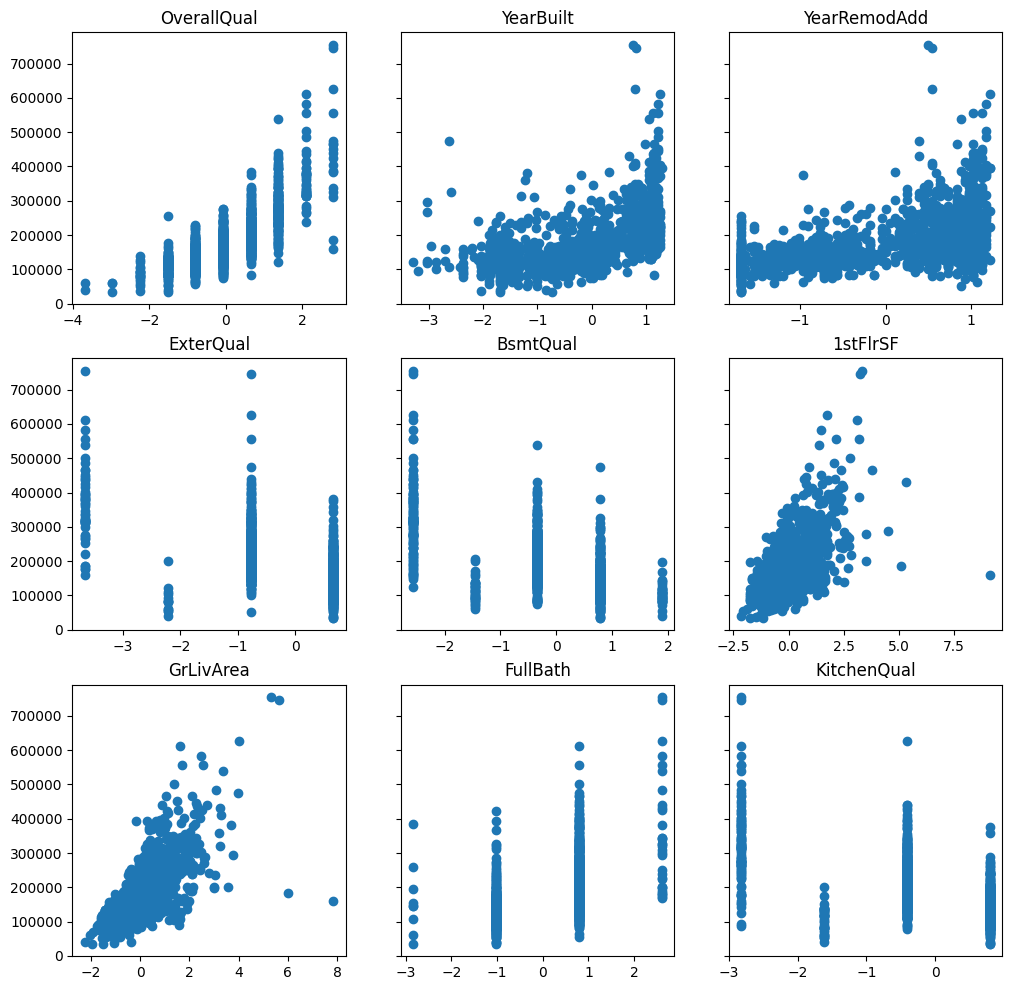

In [25]:
_ ,ax = plt.subplots(3,3,figsize=(12,12),sharey = True)
ax[0,0].scatter(house_prices_normalized["OverallQual"],house_prices_label)
ax[0,0].set_title("OverallQual")
ax[0,1].scatter(house_prices_normalized["YearBuilt"],house_prices_label)
ax[0,1].set_title("YearBuilt")
ax[0,2].scatter(house_prices_normalized["YearRemodAdd"],house_prices_label)
ax[0,2].set_title("YearRemodAdd")
ax[1,0].scatter(house_prices_normalized["ExterQual"],house_prices_label)
ax[1,0].set_title("ExterQual")
ax[1,1].scatter(house_prices_normalized["BsmtQual"],house_prices_label)
ax[1,1].set_title("BsmtQual")
ax[1,2].scatter(house_prices_normalized["1stFlrSF"],house_prices_label)
ax[1,2].set_title("1stFlrSF")
ax[2,0].scatter(house_prices_normalized["GrLivArea"],house_prices_label)
ax[2,0].set_title("GrLivArea")
ax[2,1].scatter(house_prices_normalized["FullBath"],house_prices_label)
ax[2,1].set_title("FullBath")
ax[2,2].scatter(house_prices_normalized["KitchenQual"],house_prices_label)
ax[2,2].set_title("KitchenQual")

Text(0.5, 1.0, 'GarageArea')

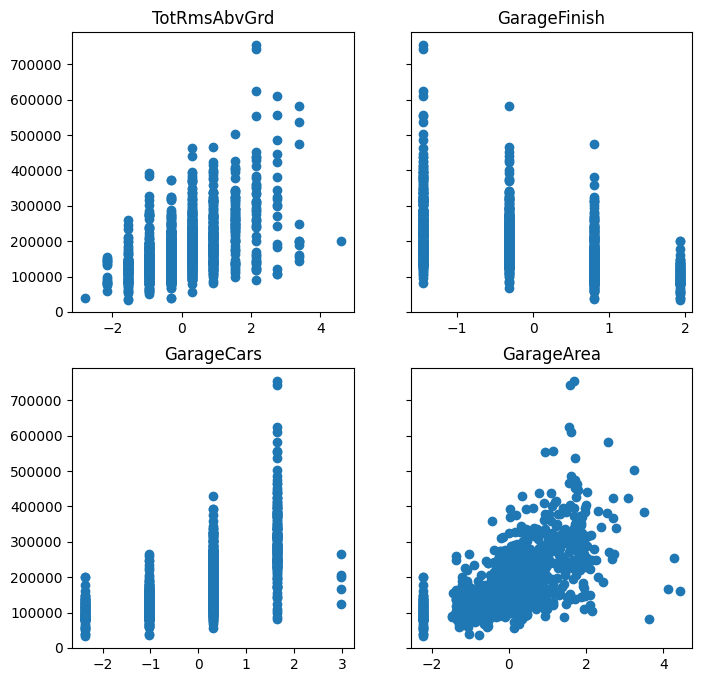

In [26]:
_ ,ax = plt.subplots(2,2,figsize=(8,8), sharey=True)
ax[0,0].scatter(house_prices_normalized["TotRmsAbvGrd"],house_prices_label)
ax[0,0].set_title("TotRmsAbvGrd")
ax[0,1].scatter(house_prices_normalized["GarageFinish"],house_prices_label)
ax[0,1].set_title("GarageFinish")
ax[1,0].scatter(house_prices_normalized["GarageCars"],house_prices_label)
ax[1,0].set_title("GarageCars")
ax[1,1].scatter(house_prices_normalized["GarageArea"],house_prices_label)
ax[1,1].set_title("GarageArea")

### Model training 

#### Split training data into train ,cross validation and test data

In [101]:
X_train,X_,Y_train,Y_ = train_test_split(house_prices_normalized,house_prices_label,test_size=0.4,random_state=42)
X_test,X_cv,Y_test,Y_cv = train_test_split(X_,Y_,test_size=0.5,random_state=42)

In [118]:
lregression = RandomForestRegressor()
lregression

RandomForestRegressor()

In [119]:
lregression.fit(X_train,Y_train)

RandomForestRegressor()

#### Model evaluation

In [120]:
lregression.score(X_train,Y_train)

0.9718531951938667

#### Model validation

In [121]:
lregression.score(X_cv,Y_cv)

0.8898528858613315

#### model testing

In [122]:
lregression.score(X_test,Y_test)

0.8471766618122359

In [123]:
house_prices_test = pd.read_csv("test.csv")
houses_id = house_prices_test["Id"]
house_prices_test = house_prices_test[X_train.columns]

In [124]:
house_prices_test

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea
0,5,1961,1961,TA,TA,882.0,896,896,1,TA,5,Unf,1.0,730.0
1,6,1958,1958,TA,TA,1329.0,1329,1329,1,Gd,6,Unf,1.0,312.0
2,5,1997,1998,TA,Gd,928.0,928,1629,2,TA,6,Fin,2.0,482.0
3,6,1998,1998,TA,TA,926.0,926,1604,2,Gd,7,Fin,2.0,470.0
4,8,1992,1992,Gd,Gd,1280.0,1280,1280,2,Gd,5,RFn,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,TA,TA,546.0,546,1092,1,TA,5,NaN,0.0,0.0
1455,4,1970,1970,TA,TA,546.0,546,1092,1,TA,6,Unf,1.0,286.0
1456,5,1960,1996,TA,TA,1224.0,1224,1224,1,TA,7,Unf,2.0,576.0
1457,5,1992,1992,TA,Gd,912.0,970,970,1,TA,6,NaN,0.0,0.0


In [125]:
for feature in house_prices_test.select_dtypes(categoricals):
    house_prices_test = LabelEncoding(house_prices_test, feature)

In [126]:
house_prices_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   ExterQual     1459 non-null   int64  
 4   BsmtQual      1459 non-null   int64  
 5   TotalBsmtSF   1458 non-null   float64
 6   1stFlrSF      1459 non-null   int64  
 7   GrLivArea     1459 non-null   int64  
 8   FullBath      1459 non-null   int64  
 9   KitchenQual   1459 non-null   int64  
 10  TotRmsAbvGrd  1459 non-null   int64  
 11  GarageFinish  1459 non-null   int64  
 12  GarageCars    1458 non-null   float64
 13  GarageArea    1458 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 159.7 KB


In [127]:
for feature in ["GarageCars","GarageArea","TotalBsmtSF"]:
    house_prices_test[feature] = fillEmpty(house_prices,feature,"zero" )

In [128]:
house_prices_test_scaled = standard_scaler.transform(house_prices_test)

In [129]:
house_prices_test_scaled = pd.DataFrame(house_prices_test_scaled, columns = X_train.columns)

In [130]:
house_prices_test_scaled

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea
0,-0.795151,-0.340077,-1.156380,0.663451,0.772619,-0.459303,-0.689929,-1.179256,-1.026041,0.795629,-0.934130,0.801942,0.311725,0.351000
1,-0.071836,-0.439440,-1.301740,0.663451,0.772619,0.466465,0.430511,-0.354966,-1.026041,-0.409369,-0.318683,0.801942,0.311725,-0.060731
2,-0.795151,0.852269,0.636400,0.663451,-0.339830,-0.313369,-0.607125,0.216136,0.789741,0.795629,-0.318683,-1.438891,0.311725,0.631726
3,-0.071836,0.885390,0.636400,0.663451,0.772619,-0.687324,-0.612300,0.168544,0.789741,-0.409369,0.296763,-1.438891,1.650307,0.790804
4,1.374795,0.686666,0.345679,-0.777976,-0.339830,0.199680,0.303718,-0.448246,0.789741,-0.409369,-0.934130,-0.318475,1.650307,1.698485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.518467,-0.041991,-0.720298,0.663451,0.772619,0.372976,-1.595596,-0.806136,-1.026041,0.795629,-0.934130,1.922359,0.311725,-0.341457
1455,-1.518467,-0.041991,-0.720298,0.663451,0.772619,-0.238122,-1.595596,-0.806136,-1.026041,0.795629,-0.318683,0.801942,0.311725,-0.060731
1456,-0.795151,-0.373198,0.539493,0.663451,0.772619,1.104925,0.158811,-0.554851,-1.026041,0.795629,0.296763,0.801942,0.311725,0.126420
1457,-0.795151,0.686666,0.345679,0.663451,-0.339830,0.215641,-0.498445,-1.038384,-1.026041,0.795629,-0.318683,1.922359,-1.026858,-1.033914


In [136]:
prediction = lregression.predict(house_prices_test_scaled)

In [137]:
test_predict_frame = pd.DataFrame(houses_id)

In [138]:
test_predict_frame["SalePrice"] = pd.DataFrame(prediction)

In [139]:
test_predict_frame.to_csv("test_predicted.csv",index=False)

In [140]:
test_predict_frame

,Id,SalePrice
0,1461,123077.00
1,1462,157521.00
2,1463,185980.13
3,1464,189358.90
4,1465,230897.84
...,...,...
1454,2915,133487.00
1455,2916,119109.50
1456,2917,156375.05
1457,2918,133559.60
